In [59]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec as gridspec
import dill

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities_ES as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice
sparse_mice = stx.ymaze_sess_deets.sparse_mice

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
sparse_sessions = stx.ymaze_sess_deets.SparseKO_sessions

In [277]:
mouse = 'SparseKO_13'
d = sparse_sessions[mouse][5]
date = d['date']
scene = d['scene']
session = d['session']

mouse, date, scene, session

('SparseKO_13', '29_05_2025', 'YMaze_LNovel', 1)

In [278]:
# load 
pkldir = os.path.join('C://Users/esay/data/Stx3/YMazeSessPkls', mouse,  date, f'{scene}_{session}.pkl')
sess = stx.session.YMazeSession.from_file(pkldir, verbose=False)

In [217]:
def plot_cells(trial_mat, cell_inds=None, n_cols=20):
    '''

    :param ca1:
    :param cell_inds: indices of cells to plot
    :param save_figs:
    :return:
    '''

    if cell_inds is None:
        cell_inds = np.arange(trial_mat.shape[-1])

    n_rows = int(np.ceil(cell_inds.shape[0] / n_cols))
    fig = plt.figure(figsize=[30, 3 * n_rows])
    gs = gridspec(n_rows, n_cols)
    
    '''
    ES changes: 
    - indexing for pc only indexing error
    '''
    
    # for cell in cell_inds:
    for i, cell in enumerate(cell_inds):
        # col = cell % n_cols
        col = i % n_cols
        # row = int(cell / n_cols)
        row = i //n_cols
        ax = fig.add_subplot(gs[row, col])
        h = ax.imshow(trial_mat[:, :, cell], cmap="magma",aspect = 'auto',interpolation='none')

        if col == 0:
            ax.set_xlabel('pos')
            ax.set_ylabel('trial #')
            if row==0:
                plt.colorbar(h,ax=ax)
        else:
            ax.set_xticks([])
            ax.set_yticks([])
    # fig.subplots_adjust(hspace=.3)
    return fig

In [279]:
chan0_left_mask = sess.place_cell_info['channel_0_F_dff']['left']['masks'] 
chan0_right_mask = sess.place_cell_info['channel_0_F_dff']['right']['masks'] 
chan1_left_mask = sess.place_cell_info['channel_1_F_dff']['left']['masks'] 
chan1_right_mask=sess.place_cell_info['channel_1_F_dff']['right']['masks'] 

In [280]:
# no masked for place cells
# trial_mask = (sess.trial_info['LR']==-1*sess.novel_arm)

# tmat = sess.trial_matrices['channel_1_F_dff_speed_filt']
# # print('channel_1_spks')

# pc_idx = np.where(chan0_left_mask[:n_cells])[0]
# fig = plot_cells(tmat, cell_inds=pc_idx)


# tmat = sess.trial_matrices['channel_0_F_dff_speed_filt']
# # print('channel_0_spks')
# fig = plot_cells(tmat[sess.trial_info['LR']==1*sess.novel_arm,:,:], cell_inds=np.array([r for r in range(100)]))


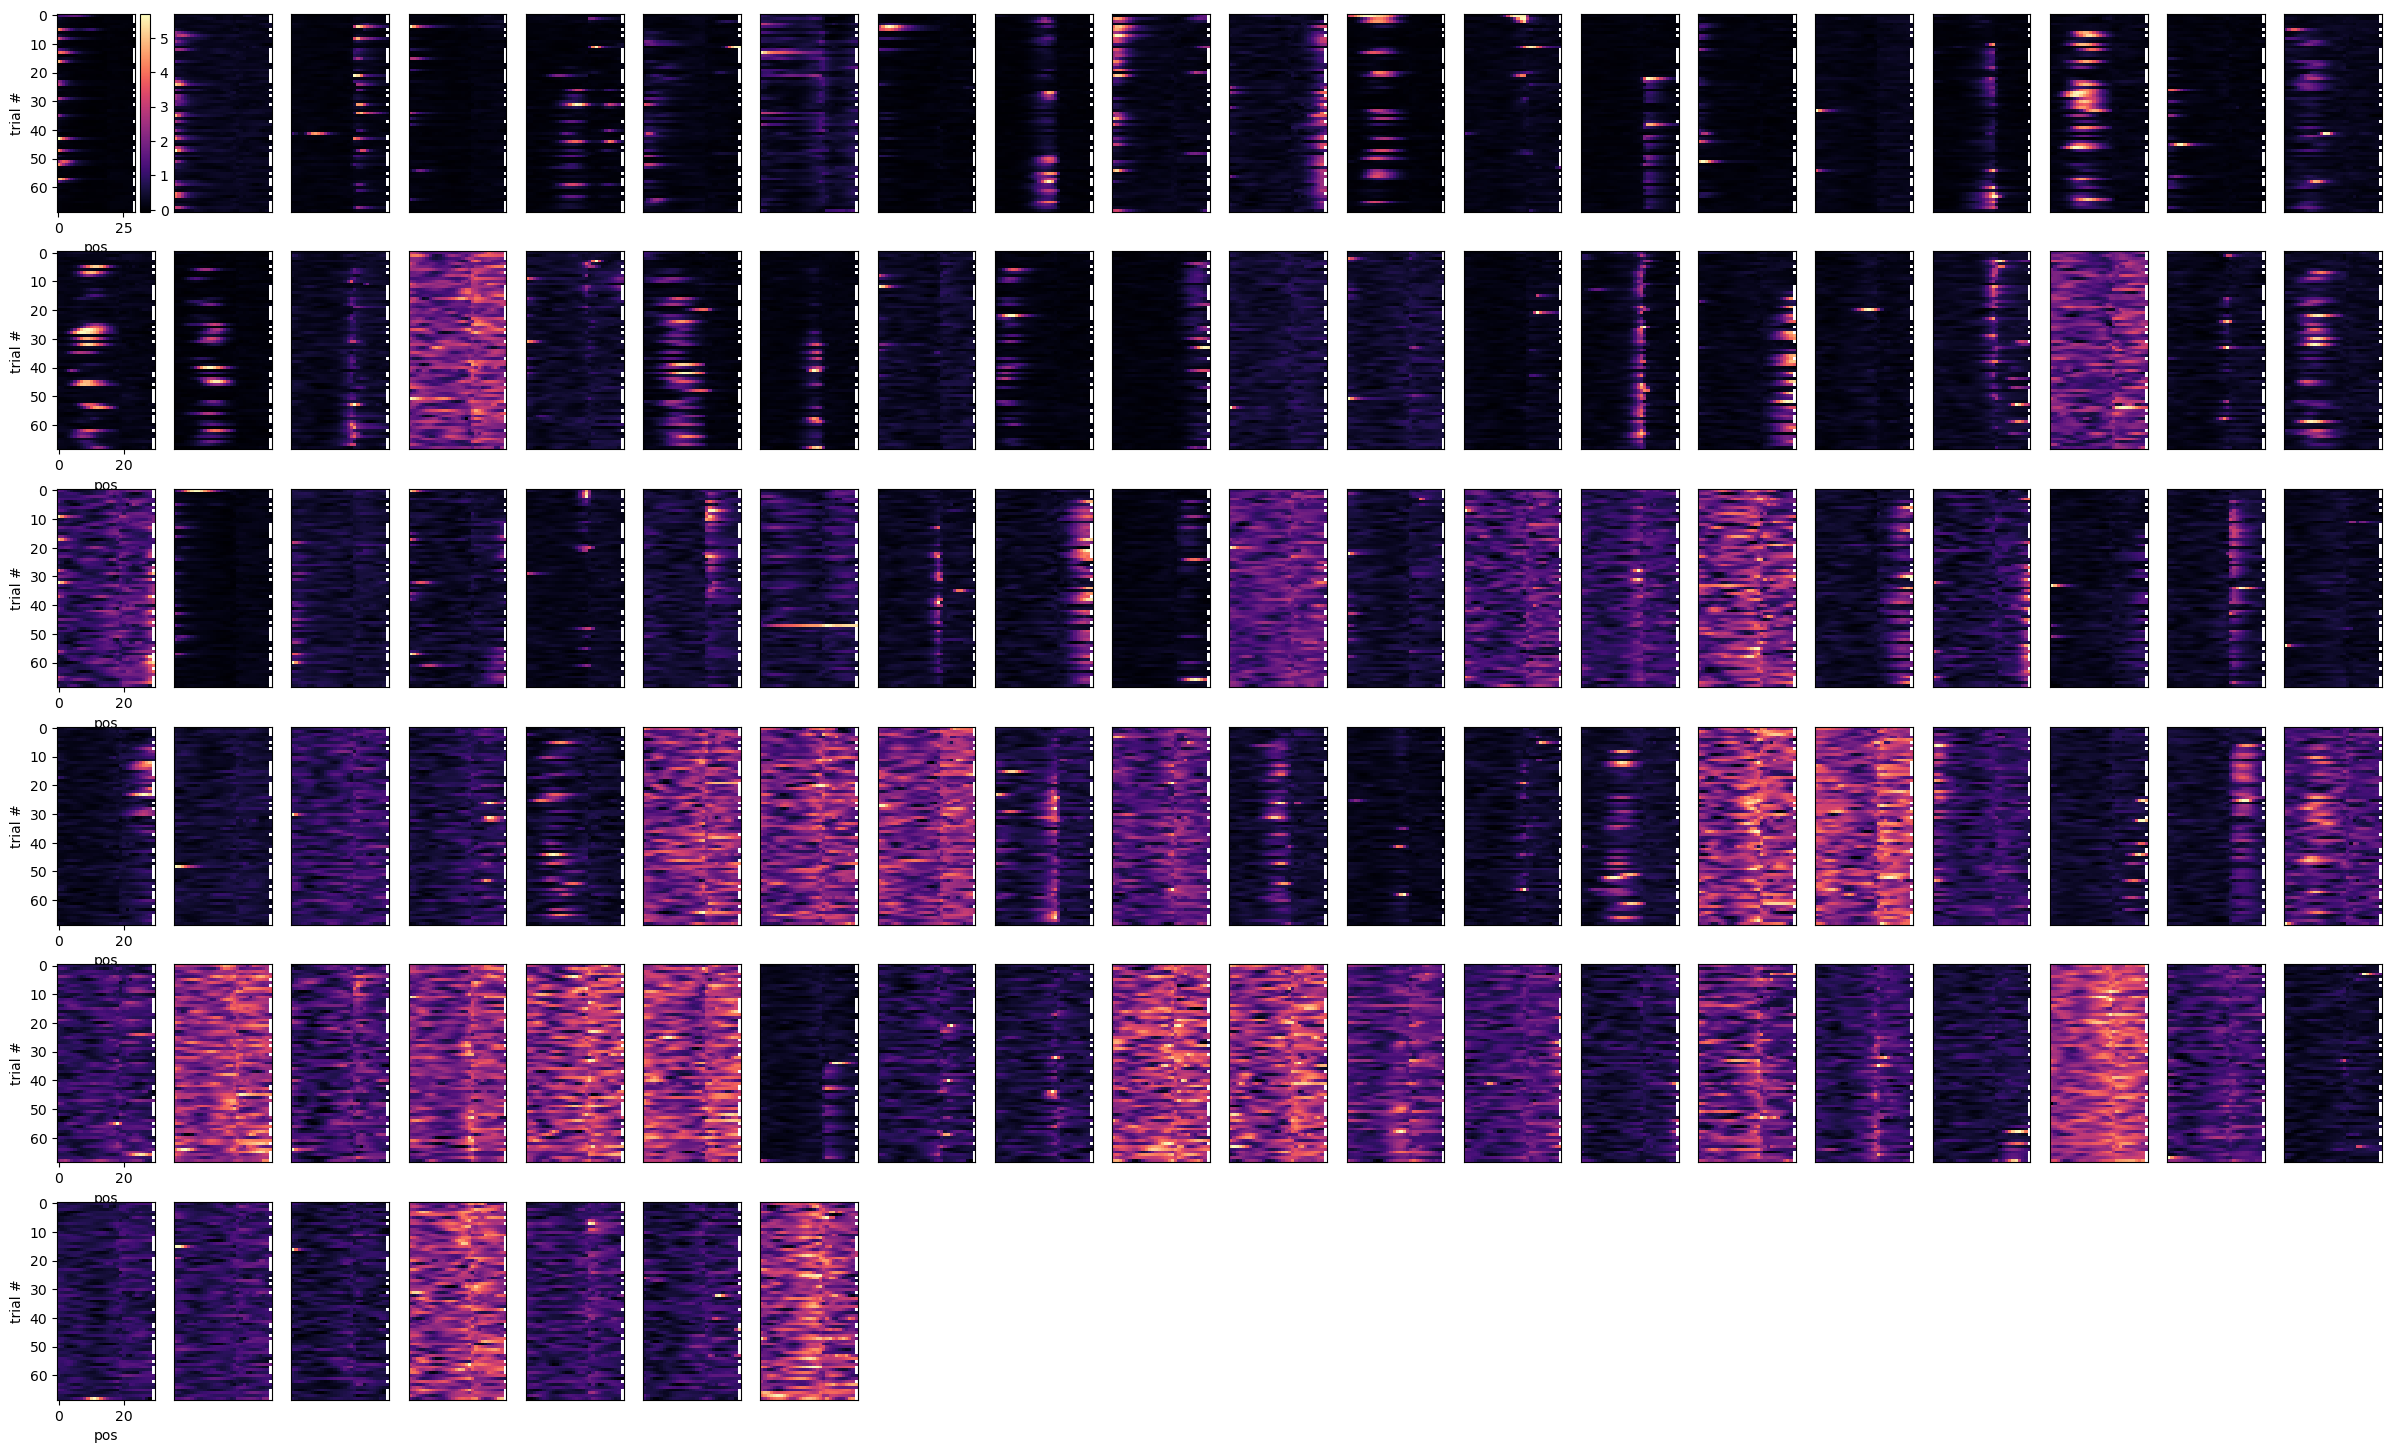

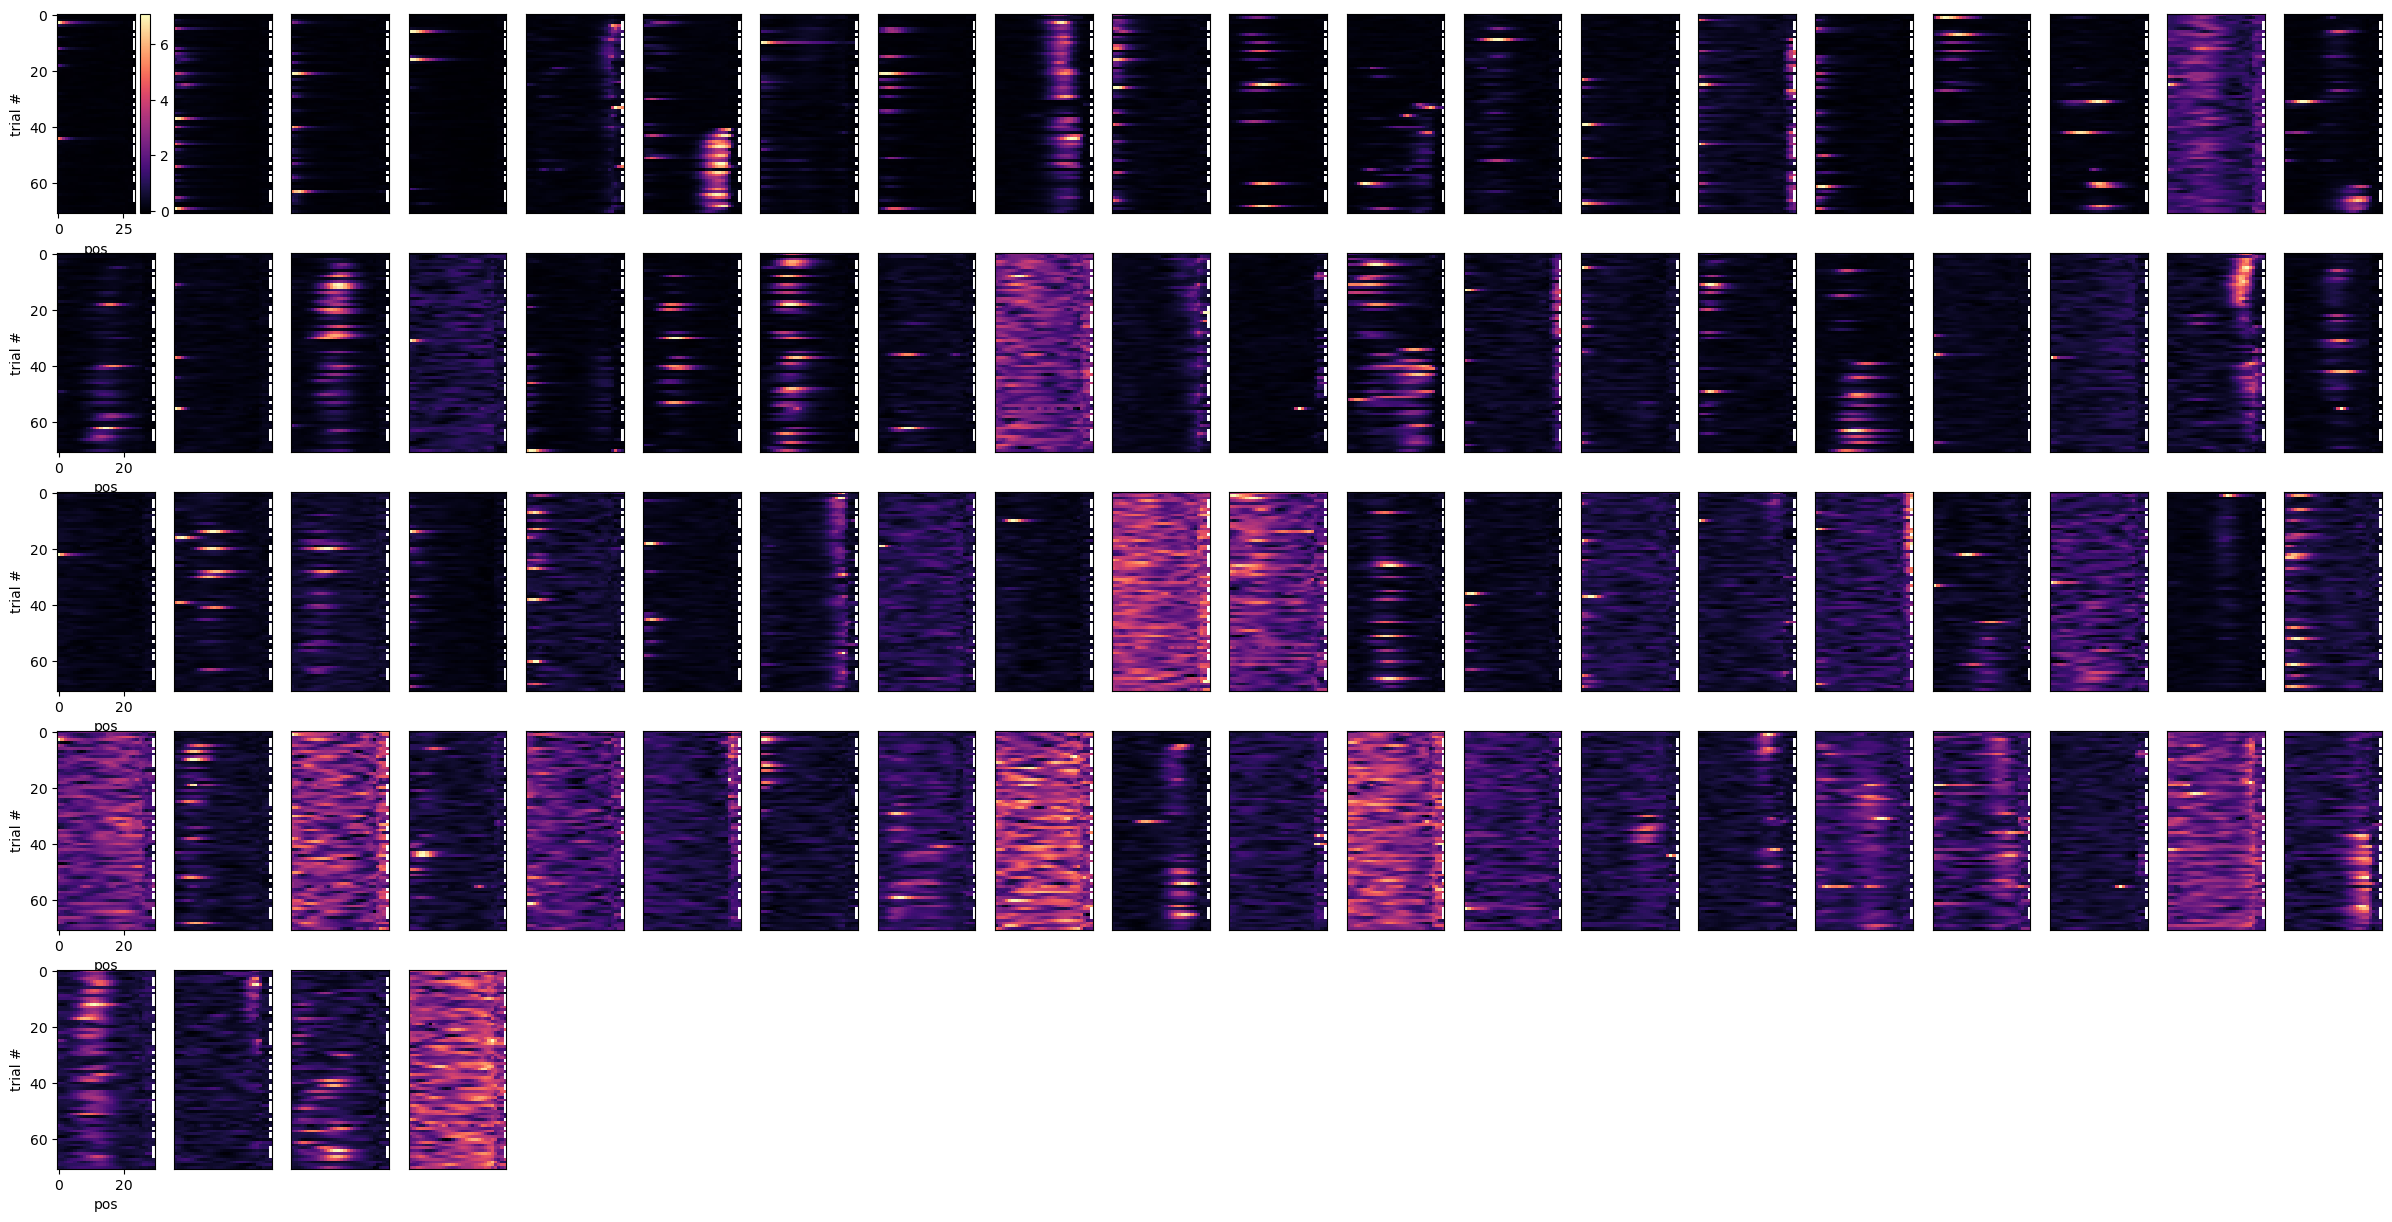

In [281]:
tmat = sess.trial_matrices['channel_0_F_dff_speed_filt']
n_cells = tmat.shape[-1]

# plot only place cells using place cell mask
pc_idx = np.where(chan0_left_mask[:n_cells])[0]
fig = plot_cells(tmat[sess.trial_info['LR']==-1*sess.novel_arm,:,:], cell_inds=pc_idx)

pc_idx = np.where(chan0_right_mask[:n_cells])[0]
fig = plot_cells(tmat[sess.trial_info['LR']==1*sess.novel_arm,:,:], cell_inds=pc_idx)


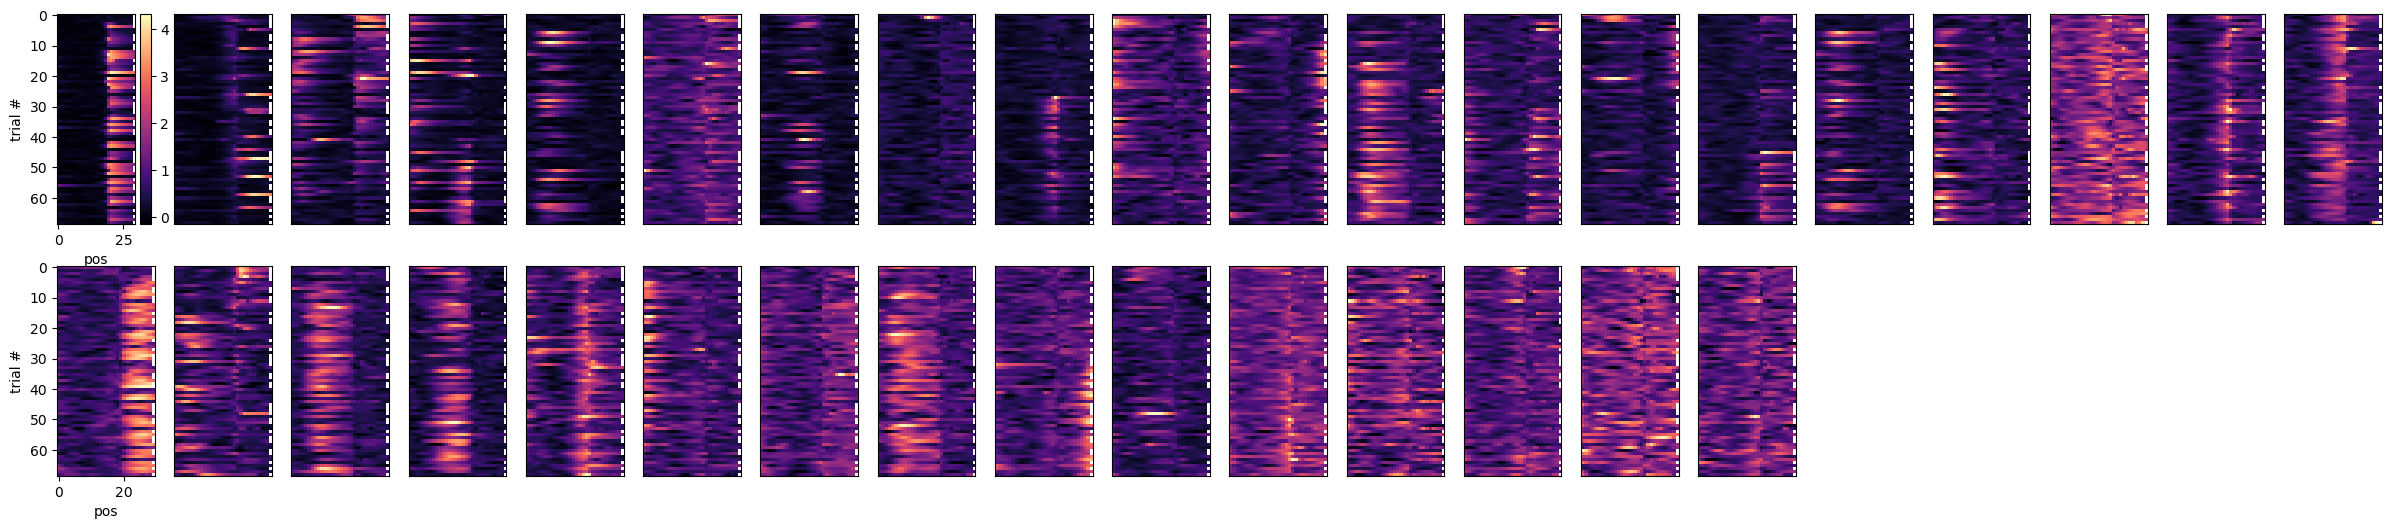

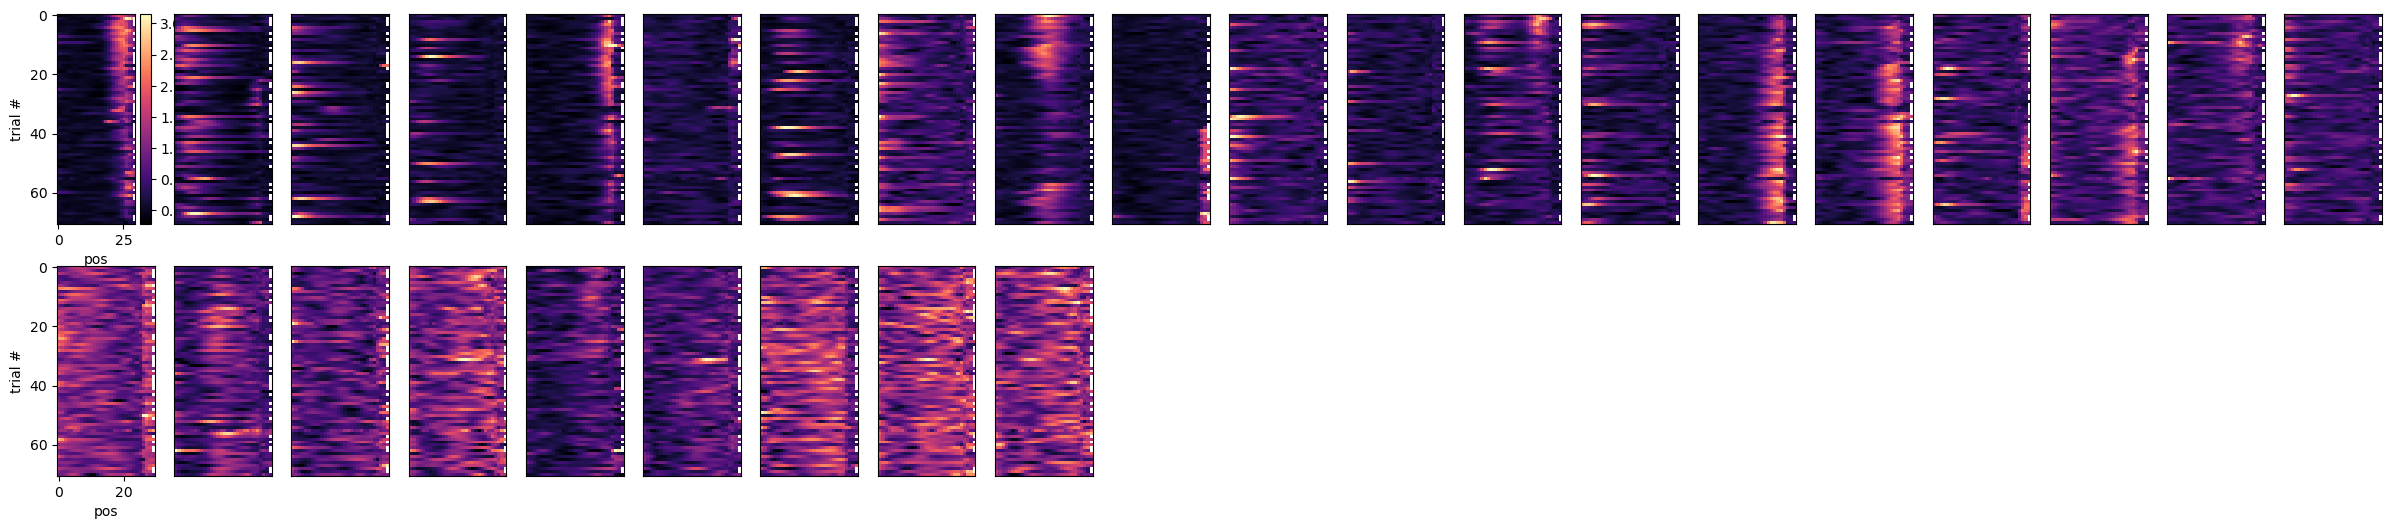

In [282]:
tmat = sess.trial_matrices['channel_1_F_dff_speed_filt']
n_cells = tmat.shape[-1]


#place cells only
pc_idx = np.where(chan1_left_mask[:n_cells])[0]
# fig = plot_cells(tmat, cell_inds=pc_idx)


fig = plot_cells(tmat[sess.trial_info['LR']==-1*sess.novel_arm,:,:], cell_inds=pc_idx)

pc_idx = np.where(chan1_right_mask[:n_cells])[0]
fig = plot_cells(tmat[sess.trial_info['LR']==1*sess.novel_arm,:,:], cell_inds=pc_idx)